In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark 3.1.2 with Hadoop 2.7
!wget https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Extract the archive
!tar -xvzf spark-3.1.2-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark


--2025-06-12 00:31:25--  https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224445805 (214M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop2.7.tgz’

spark-3.1.2-bin-had 100%[===================>] 214.05M  13.1MB/s    in 16s     

2025-06-12 00:31:41 (13.7 MB/s) - ‘spark-3.1.2-bin-hadoop2.7.tgz’ saved [224445805/224445805]

spark-3.1.2-bin-hadoop2.7/
spark-3.1.2-bin-hadoop2.7/R/
spark-3.1.2-bin-hadoop2.7/R/lib/
spark-3.1.2-bin-hadoop2.7/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop2.7/R/li

In [5]:
import os
import findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

# Initialize findspark
findspark.init()

from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder.appName("BigDataProject").getOrCreate()

print("✅ Spark session started successfully!")


✅ Spark session started successfully!


In [6]:
# For Mondial
df_mondial = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/continent.json")

# For COVID CSV dataset
df_covid = spark.read.csv("/content/drive/MyDrive/big_data_project/usa_county_wise.csv", header=True, inferSchema=True)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving borders.json to borders.json
Saving city.json to city.json
Saving continent.json to continent.json
Saving country.json to country.json
Saving desert.json to desert.json
Saving economy.json to economy.json
Saving encompasses.json to encompasses.json
Saving ethnicgroup.json to ethnicgroup.json
Saving geo_desert.json to geo_desert.json
Saving geo_estuary.json to geo_estuary.json
Saving geo_island.json to geo_island.json
Saving geo_lake.json to geo_lake.json
Saving geo_mountain.json to geo_mountain.json
Saving geo_river.json to geo_river.json
Saving geo_sea.json to geo_sea.json
Saving geo_source.json to geo_source.json
Saving island.json to island.json
Saving islandin.json to islandin.json
Saving ismember.json to ismember.json
Saving lake.json to lake.json
Saving language.json to language.json
Saving located.json to located.json
Saving locatedon.json to locatedon.json
Saving mergeswith.json to mergeswith.json
Saving mountain.json to mountain.json
Saving mountaintonisland.json to mou

In [ ]:
!mkdir mondial


mkdir: cannot create directory ‘mondial’: File exists


In [ ]:
!mv *.json mondial/


In [ ]:
mondial_path = "mondial"

for file in os.listdir(mondial_path):
    if file.endswith(".json"):
        table_name = file.replace(".json", "")
        full_path = os.path.join(mondial_path, file)
        df = spark.read.json(full_path)
        df.createOrReplaceTempView(table_name)
        print(f"✅ Loaded table: {table_name}")


✅ Loaded table: geo_estuary
✅ Loaded table: mergeswith
✅ Loaded table: city
✅ Loaded table: economy
✅ Loaded table: geo_source
✅ Loaded table: mountain
✅ Loaded table: sea
✅ Loaded table: religion
✅ Loaded table: geo_lake
✅ Loaded table: encompasses
✅ Loaded table: ismember
✅ Loaded table: province
✅ Loaded table: continent
✅ Loaded table: ethnicgroup
✅ Loaded table: geo_desert
✅ Loaded table: population
✅ Loaded table: lake
✅ Loaded table: locatedon
✅ Loaded table: island
✅ Loaded table: organization
✅ Loaded table: geo_sea
✅ Loaded table: located
✅ Loaded table: geo_river
✅ Loaded table: mountaintonisland
✅ Loaded table: desert
✅ Loaded table: geo_island
✅ Loaded table: river
✅ Loaded table: politics
✅ Loaded table: country
✅ Loaded table: borders
✅ Loaded table: geo_mountain
✅ Loaded table: islandin
✅ Loaded table: language


In [9]:
# Reading the files from drive
df_city = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/city.json")
df_country = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/country.json")
df_organization = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/organization.json")
df_located = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/located.json")
df_located.createOrReplaceTempView("located")


df_city.createOrReplaceTempView("city")
df_country.createOrReplaceTempView("country")
df_organization.createOrReplaceTempView("organization")

spark.sql("""
WITH Kryeqytetet AS (
  SELECT DISTINCT c.Name AS Kryeqytetet
  FROM city c
  RIGHT JOIN country co ON c.Name = co.Capital
  WHERE c.Name IS NOT NULL
),
Kryeqytetet_Organizat AS (
  SELECT k.Kryeqytetet AS Kryeqytetet_O
  FROM Kryeqytetet k
  WHERE EXISTS (
    SELECT 1 FROM organization o WHERE o.City = k.Kryeqytetet
  )
)
SELECT ko.Kryeqytetet_O
FROM Kryeqytetet_Organizat ko
WHERE NOT EXISTS (
  SELECT 1 FROM located l WHERE l.City = ko.Kryeqytetet_O
)
""").show()


+--------------+
| Kryeqytetet_O|
+--------------+
|      Gaborone|
|          Lima|
|        Madrid|
|        Prague|
|   Tegucigalpa|
|         Amman|
|       Caracas|
|         Minsk|
|      Pretoria|
|     Jerusalem|
|   Mexico City|
|    Washington|
|        Riyadh|
|     Kathmandu|
|      Brussels|
|      Damascus|
|Guatemala City|
|       Bangkok|
|    Luxembourg|
|        Tehran|
+--------------+
only showing top 20 rows



In [11]:
df_mountain = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/mountain.json")
df_geo_mountain = spark.read.json("/content/drive/MyDrive/big_data_project/mondial/geo_mountain.json")

df_mountain.createOrReplaceTempView("mountain")
df_geo_mountain.createOrReplaceTempView("geo_mountain")

spark.sql("""
  SELECT m.Name AS Mountain_Name,
         MAX(m.Height) AS Height
  FROM mountain m
  JOIN geo_mountain g ON m.Name = g.Mountain
  WHERE g.Country IN ('AL', 'BIH', 'BG', 'HR', 'GR', 'XK', 'MNE', 'MK', 'RO', 'SI')
  GROUP BY m.Name
  ORDER BY Height DESC
  LIMIT 5
""").show()


+-------------+------+
|Mountain_Name|Height|
+-------------+------+
|       Musala|2925.0|
|        Olymp|2917.0|
|        Korab|2751.0|
|      Jezerce|2694.0|
|   Moldoveanu|2544.0|
+-------------+------+



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving usa_county_wise.csv to usa_county_wise.csv


In [ ]:
# Step 2: Create the destination folder in Drive (only needed once)
!mkdir -p /content/drive/MyDrive/big_data_project

!cp -r usa_county_wise.csv /content/drive/MyDrive/big_data_project/
!cp -r mondial /content/drive/MyDrive/big_data_project/



In [ ]:
# Load the CSV file with header and inferred data types
covid_df = spark.read.csv("usa_county_wise.csv", header=True, inferSchema=True)

# Register it as a SQL table
covid_df.createOrReplaceTempView("covid")

# Preview the schema
covid_df.printSchema()


root
 |-- UID: integer (nullable = true)
 |-- iso2: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- code3: integer (nullable = true)
 |-- FIPS: double (nullable = true)
 |-- Admin2: string (nullable = true)
 |-- Province_State: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long_: double (nullable = true)
 |-- Combined_Key: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)



In [13]:
df_covid = spark.read.csv("/content/drive/MyDrive/big_data_project/usa_county_wise.csv", header=True, inferSchema=True)
df_covid.createOrReplaceTempView("covid")


spark.sql("""
  SELECT Province_State AS State,
         SUM(Confirmed) AS Total_Confirmed
  FROM covid
  GROUP BY Province_State
  ORDER BY Total_Confirmed DESC
  LIMIT 10
""").show()


+-------------+---------------+
|        State|Total_Confirmed|
+-------------+---------------+
|     New York|       39808447|
|   California|       17618695|
|   New Jersey|       16506714|
|        Texas|       12698726|
|      Florida|       12657802|
|     Illinois|       11900637|
|Massachusetts|        9874030|
| Pennsylvania|        8096993|
|      Georgia|        6859759|
|     Michigan|        6690544|
+-------------+---------------+



In [15]:
df_covid = spark.read.csv("/content/drive/MyDrive/big_data_project/usa_county_wise.csv",header=True,inferSchema=True)
df_covid.createOrReplaceTempView("covid")

spark.sql("""
  SELECT Province_State AS State,
         SUM(Deaths) AS Total_Deaths,
         SUM(Confirmed) AS Total_Confirmed,
         ROUND(SUM(Deaths) * 100.0 / SUM(Confirmed), 2) AS Death_Rate_Percent
  FROM covid
  WHERE Confirmed > 0
  GROUP BY Province_State
  ORDER BY Death_Rate_Percent DESC
  LIMIT 10
""").show()


+--------------------+------------+---------------+------------------+
|               State|Total_Deaths|Total_Confirmed|Death_Rate_Percent|
+--------------------+------------+---------------+------------------+
|         Connecticut|      374345|        4239220|              8.83|
|            Michigan|      576004|        6690544|              8.61|
|Northern Mariana ...|         230|           2741|              8.39|
|            New York|     3175935|       39808447|              7.98|
|          New Jersey|     1221257|       16506714|              7.40|
|       Massachusetts|      666140|        9874030|              6.75|
|        Pennsylvania|      537249|        8096993|              6.64|
|       New Hampshire|       25377|         471598|              5.38|
|           Louisiana|      285081|        5383429|              5.30|
|             Indiana|      200183|        3792618|              5.28|
+--------------------+------------+---------------+------------------+



In [18]:
df_covid = spark.read.csv("/content/drive/MyDrive/big_data_project/usa_county_wise.csv", header=True, inferSchema=True)
df_covid.createOrReplaceTempView("covid")

spark.sql("""
  SELECT Admin2 AS County, Province_State AS State,
         SUM(Confirmed) AS Confirmed, SUM(Deaths) AS Deaths
  FROM covid
  GROUP BY Admin2, Province_State
  ORDER BY Confirmed DESC
  LIMIT 10
""").show()


+------------+------------+---------+-------+
|      County|       State|Confirmed| Deaths|
+------------+------------+---------+-------+
|    New York|    New York| 21813290|2355309|
| Los Angeles|  California|  7640428| 262977|
|        Cook|    Illinois|  7616290| 360612|
|      Nassau|    New York|  4391725| 215084|
|     Suffolk|    New York|  4248752| 183141|
| Westchester|    New York|  3665043| 136980|
|  Miami-Dade|     Florida|  3350178|  79217|
|    Maricopa|     Arizona|  3259255|  62901|
|Philadelphia|Pennsylvania|  2326353| 128873|
|      Harris|       Texas|  2319014|  29913|
+------------+------------+---------+-------+



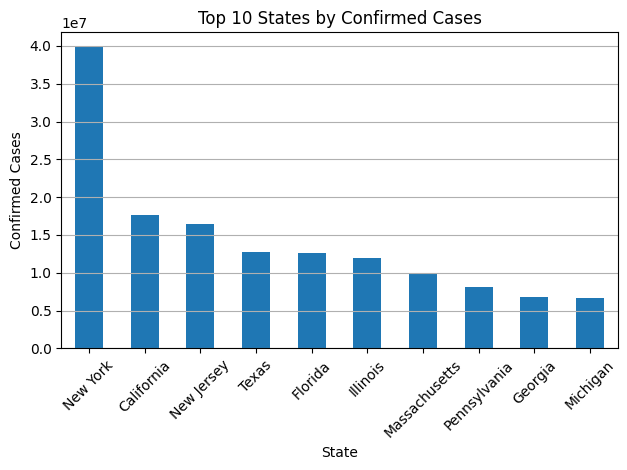

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

top_states = spark.sql("""
  SELECT Province_State AS State, SUM(Confirmed) AS Confirmed
  FROM covid
  GROUP BY Province_State
  ORDER BY Confirmed DESC
  LIMIT 10
""").toPandas()

top_states.plot(kind='bar', x='State', y='Confirmed', legend=False)
plt.title("Top 10 States by Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


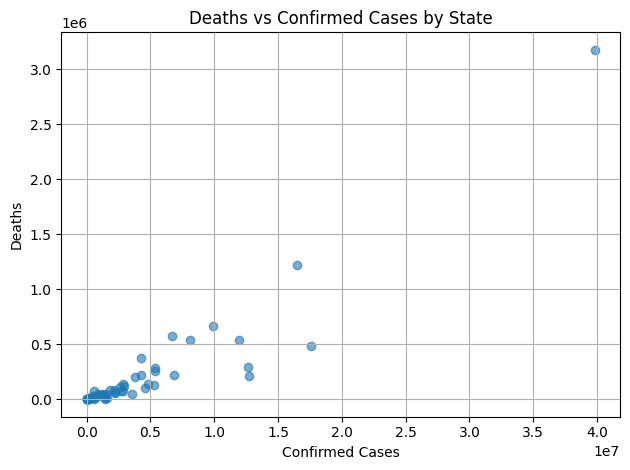

In [17]:
scatter_df = spark.sql("""
  SELECT SUM(Confirmed) AS Confirmed, SUM(Deaths) AS Deaths
  FROM covid
  GROUP BY Province_State
""").toPandas()

plt.scatter(scatter_df["Confirmed"], scatter_df["Deaths"], alpha=0.6)
plt.title("Deaths vs Confirmed Cases by State")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()
